In [1]:
# Display the current working directory
getwd();
# If necessary, change the path below to the directory where the data files are stored.
# "." means current directory. On Windows use a forward slash / instead of the usual \.
workingDir = ".";
setwd(workingDir);
# Load the WGCNA package
library(WGCNA);
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE);
#Read in the female liver data set
geneData = read.csv("TotalPairwiseMarkerGene.regress_out_layer.csv", stringsAsFactors = FALSE, row.names = 1, header= TRUE);
# Take a quick look at what is in the data set:
dim(geneData);
names(geneData);

[1] "/home/hanliu/project/mouse_rostral_brain/study/ITSpatial/DMGAnalysis/WGCNA"

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




[1] 4219   27

[1] "IT.L23.ACA" "IT.L23.AI"  "IT.L23.MOp" "IT.L23.MOs" "IT.L23.ORB"
 [6] "IT.L23.PFC" "IT.L23.SSp" "IT.L23.SSs" "IT.L4.MOp"  "IT.L4.MOs" 
[11] "IT.L4.SSp"  "IT.L4.SSs"  "IT.L5.ACA"  "IT.L5.AI"   "IT.L5.MOp" 
[16] "IT.L5.MOs"  "IT.L5.ORB"  "IT.L5.PFC"  "IT.L5.SSp"  "IT.L5.SSs" 
[21] "IT.L6.ACA"  "IT.L6.AI"   "IT.L6.MOp"  "IT.L6.MOs"  "IT.L6.PFC" 
[26] "IT.L6.SSp"  "IT.L6.SSs"

In [2]:
datExpr0 = t(geneData)
head(datExpr0)

,ENSMUSG00000054863.9,ENSMUSG00000056427.10,ENSMUSG00000042757.16,ENSMUSG00000028519.16,ENSMUSG00000052942.13,ENSMUSG00000039372.5,ENSMUSG00000045095.16,ENSMUSG00000039621.13,ENSMUSG00000033306.15,ENSMUSG00000061578.8,⋯,ENSMUSG00000099543.1,ENSMUSG00000041890.17,ENSMUSG00000026637.13,ENSMUSG00000070287.3,ENSMUSG00000023009.14,ENSMUSG00000101755.1,ENSMUSG00000109095.1,ENSMUSG00000009214.9,ENSMUSG00000031853.5,ENSMUSG00000021794.16
IT.L23.ACA,0.5702551,0.41303518,0.2836025,0.1580626,2.603081,0.2148497,0.20273833,0.4086469,1.6524881,-0.25293964,⋯,0.006587061,1.6143305,-0.0464618,-0.52652350,0.5609217,-0.2326880,1.7939174,0.39548215,-0.6237836,0.9423235
IT.L23.AI,0.6501530,0.04034719,-0.2560692,-0.7260596,-1.222091,-0.1551833,-0.47925508,-0.2427647,0.5702715,-0.05564165,⋯,-1.004952100,-0.3706961,-0.2785842,-0.44369042,-0.1163820,-0.1188867,-1.0588695,-1.73777760,0.7366625,-0.4929363
IT.L23.MOp,-0.8357884,-1.10337110,-0.6725073,-0.5107365,-1.642984,-0.3335454,-0.47305474,-0.8352704,-1.2964956,-0.16821378,⋯,-0.080548085,-0.6309077,0.0401339,-0.06674244,-0.3403688,0.1677686,-1.4879045,-0.10985829,0.3162126,-0.2519738
IT.L23.MOs,-0.5294699,0.08076332,-0.6673665,-1.1297227,-1.062751,-0.3205158,-0.30619450,-0.5625730,1.0073875,-0.91552335,⋯,-0.098140980,-0.3039812,0.2874918,0.97826284,-0.2556140,1.1949407,-0.6752679,0.10479614,0.4133674,-0.4042858
IT.L23.ORB,0.8576981,2.07925460,2.0548136,1.1547818,1.082231,0.7995511,-0.65648466,1.8192505,0.1054463,1.25138440,⋯,-0.027596993,0.9744580,0.2421339,-0.44206595,1.0494055,-0.3561383,1.3223157,0.01125392,-0.9586010,-0.4663590
IT.L23.PFC,0.8126617,0.85656560,0.3614350,-0.1820796,1.621971,-0.2961611,0.03239949,0.9459282,1.5817232,-0.48452115,⋯,-0.413414780,1.3721752,-0.4034471,-0.10495172,0.6475152,-0.3879295,1.0547817,-0.88850330,-0.2776411,0.3167568


In [3]:
gsg = goodSamplesGenes(datExpr0, verbose = 3);
gsg$allOK

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

clust
 0 
27 

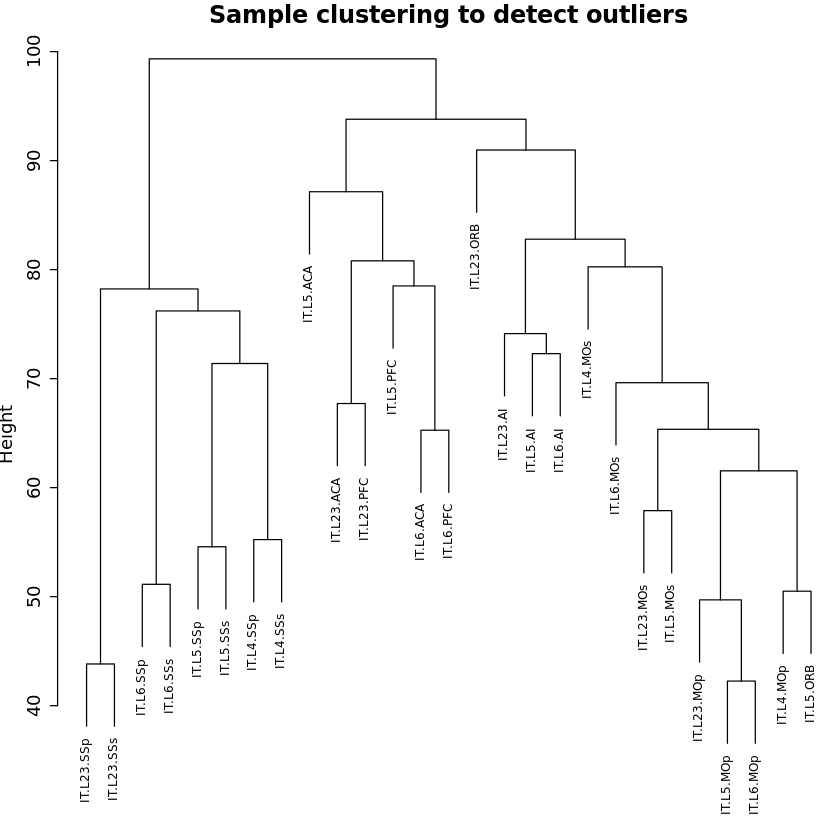

In [4]:
sampleTree = hclust(dist(datExpr0), method = "average");
# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.
par(cex = 0.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
cex.axis = 1.5, cex.main = 2)


# Plot a line to show the cut
abline(h = 15, col = "red");
# Determine cluster under the line
clust = cutreeStatic(sampleTree, cutHeight = 15, minSize = 10)
table(clust)
datExpr <- datExpr0

In [5]:
save(datExpr, file = "WGCNA.dataInput.RData")